# Konzept 1: Ausdrücke und Variablen

## Ausdrücke

Eine ganz einfache Variante sind einfache Rechnungen.
In jeder Zelle stehen in oder mehrere Zeilen Programmcode, die mittels `Shift+Return` ausgewertet werden.
(`Ctrl+Return` gibt es auch, es wird hierbei nicht zur nächsten Zelle vorwärts gesprungen)
z.B.:

In [1]:
3 + 8

11

In [2]:
5 + (1 + 5) / 2

8

Apropos Sprachversionen: aus "mathematischer" Sicht gibt es bei Divisionen einen entscheidenden Unterschied. In Version 2 ist die Division mit "`/`" abrundend auf die nächste Ganzzahl, während in Verion 3 die handelsübliche Interpretation einer Division verwendet wird (abrundend ist "`//`").

Mittels "`from __future__ import division`" kann in Version 2 das Verhalten von Version 3 erzwungen werden:

In [3]:
9 / 4

2

In [4]:
from __future__ import division
9 / 4

2.25

Im Allgmeinen ist es eine gute Idee, diesen Import immer zu aktivieren.

Striktes Abrunden:

In [5]:
9 // 4

2

... und Modulorechnungen mit `%`:

In [6]:
9 % 4

1

### Zahlentypen

Brüche mit `Fraction`

In [7]:
from fractions import Fraction
a = Fraction("33/31003100")
b = Fraction("-9/100000100001")
print(a * b ** 4)

2673/38275585202254501783218213917955539030103719395100


Dezimalzahlen, die nicht die übliche in dem Computer eingebaute fixe
[IEEE 754-2008](http://en.wikipedia.org/wiki/IEEE_floating_point) Genauigkeit haben und eventuelle Rundungsfehler erzeugen,
sondern [IEEE 854-1987](http://en.wikipedia.org/wiki/IEEE_854-1987) für strengere Genauigkeit folgen, mittels `Decimal`:

In [8]:
print(1.1 + 2.2 - 3.3)

4.4408920985e-16


In [9]:
from decimal import Decimal
u = Decimal("1.1") + Decimal("2.2")
v = Decimal("-3.3")
print(u + v)

0.0


`mpmath` erlaubt, analytische Ausdrücke auf höherer Genauigkeit auszuwerten

In [10]:
import mpmath as mpm
mpm.mp.dps = 100

In [11]:
a = mpm.mpf("49.00000000000000001")
b = mpm.mpf( "7.00000000000000001")
a / b**2

mpf('0.999999999999999997346938775510204087172011661807580164514785506039150372463854346403284314358813079585')

In [12]:
mpm.sin(mpm.mpf("3.1415926535"))

mpf('0.00000000008979323846264338327938221965910388125990692946182694867743526330407406677351504727435623041438215811254')

Intervallzahlen mit `mpmath`'s `mpi`

In [13]:
x = mpm.mpi("1", "2")
y = mpm.mpi("3", "4.5")
z = x * y
print x, "*", y, "=", z

[1.0, 2.0] * [3.0, 4.5] = [3.0, 9.0]


## Zeicheketten (Strings)

Eine ganz wichtige Kategorie von Ausdrücken sind Zeichenketten (engl. "strings").
Diese werden zwischen einfachen oder doppelten Anführungszeichen eingegeben.
Später mehr dazu (siehe "Konzept 5: Datenstrukturen"), hier nur ein einfaches Beispiel:

In [14]:
"dies ist eine Zeichenkette"

'dies ist eine Zeichenkette'

Zusammenführen mehrerer Strings

In [15]:
"String1" + "String2"

'String1String2'

Einfügen eines Strings in eine bestehende Zeichenkette (an der Stelle `%s`).
Beachte, einfache Anführungszeichen können innerhalb doppelter Anführungszeichen verwendet werden (und umgekehrt).

In [16]:
u"Der Name '%s' ist männlich." % "Hubert"

u"Der Name 'Hubert' ist m\xe4nnlich."

Bemerkung: Das vorangestellte `u` kodiert die Zeichen mittels [unicode](https://docs.python.org/2/tutorial/introduction.html#unicode-strings).

Formatieren einer Fließkommazahl in einem String (hier mit 3 Nachkommastellen):

In [17]:
"Das Wasser hat %.3f °C" % 3.1415926535

'Das Wasser hat 3.142 \xc2\xb0C'

Die Methode `.format()` erledigt [komplexere Formatierungsaufgaben](https://docs.python.org/2/library/string.html#formatspec):

* `{:>20s}`: string-format, auf mindestens 20 Zeichen breite mit Leerzeichen auffüllen, und "`>`" macht es rechtsbündig,
* `{abc:.4f}`: formatiert das Argument `abc` als floating-point Zahl mit 4 Nachkommastellen.

In [18]:
"{:>20s}: {abc:.4f}".format("test", abc = 42)

'                test: 42.0000'

## Vergleichsoperatoren

Einer der wichtigsten Typen von Ausdrücken sind Vergleichsoperatoren.
Das sind tests auf 

* Identität ("`is`") -- wo die zu vergleichenden Objekte exakt ident sein müssen.
  Das heißt, sie sind sich nicht nur ähnlich, sondern liegen jeweils tatsächlich in derselben Stelle des Speichers.
* Equvivalenz ("`==`") -- hier wird, abhängig von der Vergleichsoperation (!), die Gleichheit festgestellt.
* Relation ("`<`", "`>=`", ...) -- test auf Ungleichheit, ebenfalls von der konkreten Implementation des Vergleichsoperators abhängig.

In [19]:
"abc" is "abc"

True

In [20]:
6 == 2 * 3

True

In [21]:
6 > 10

False

Es ist auch oft möglich -- wenn sinnvoll -- unterschiedliche Typen zu vergleichen:

In [22]:
6.1 < 10   # float mit int

True

## Variablen

Die Quintessenz eines Programmes ist dessen Flexibilität gegenüber Eingaben.
Wäre die Eingabe fest vorgegeben,
gäbe es nur wenig Gründe das Programm mehr als nur einmal aufzurufen!

_Quiz:_ Gib einen Grund an, warum ein Programm ohne Dateneingabe mehrmals aufgerufen werden könnte?

Antwort: 

Zuweisungen passieren so, dass in der Zeile zuerst eine Variable steht,
dann ein Gleichzeitszeichen, und dann ein Ausdruck der Ausgewertet wird.
Hinweis: Der Wert der Variablen `x` ist in der darunterliegenden Zelle weiterhin verfügbar.

In [23]:
x = 4
5 * x + 1

21

In [24]:
y = 2 * x + 1
9 - y - x

-4

Wichtig ist, dass die Zuweisung an `x` vor dessen Verwendung in der zweiten Zelle passiert.
Eine Variable ohne vorheriger Zuweisung erzeugt einen Fehler:

In [25]:
p + 23

NameError: name 'p' is not defined

Variablen können (und sollen meistens) mehr als einen Buchstaben haben.
Dabei sind Groß- und Kleinbuchstaben und Zahlen ab dem zweiten Zeichen erlaubt.
Als einziges Sonderzeichen gibt es den `_` Unterstrich.
(das gilt für Python in der Sprachversion 2, Version 3 erlaubt mehr Zeichen.)

In [26]:
apfel_preis = 0.99
stueck = 13
preis = stueck * apfel_preis
print(preis)

12.87


Die vorhergehende Zelle definiert mehrere Variablen und berechnet den Preis des Einkaufs.
Das Wort `print` mit anschließenden Klammern gibt den Inhalt der Variablen `preis` aus
und ist ein Beispiel für den Aufruf einer Funktion.

**Wichtig**: Es gibt zwischen den Programmiersprachen subtile Unterschiede,
wie genau die Bedeutung einer Variablen ist und wie sie sich im Kontext von Ausdrücken verhält.

Bezüglich Python kann man es sich am besten so vorstellen,
dass ein Variablenname das Etikett zur Beschriftung einer Box (dem "Wert") ist.

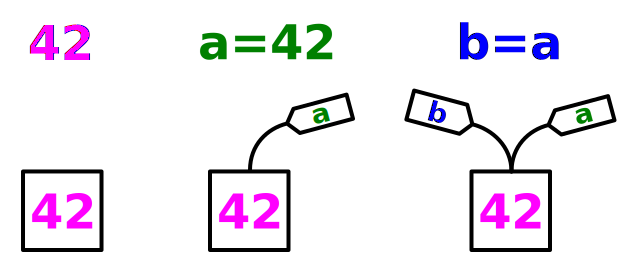

In [27]:
from IPython.display import SVG
from os.path import join
SVG(filename=join('res', 'variable.svg'))

Es kann nämlich auch folgendes passieren:

* Eine Box hat mehr als nur ein Label, sprich, zwei Variablen zeigen auf genau denselben Wert.
* Im konkreten Fall von `b=a`, wird zuerst die rechte Seite auf das jeweilige Objekt hinter `a` "dereferenziert", und dann `b` zugeweisen.
* Es existiert ein Label, das auf nichts Zeigt (das ist in Python der "`None`" Wert)

In [28]:
a = 42
b = a

In [29]:
a

42

In [30]:
b

42

Der eingebaute Befehl `id` gibt die interne Speicheradresse des Wertes zurück.
Dieser ist hier genau gleich, da es sich um die identischen Objekte im Speicher handelt.
Dies funktioniert mit beliebigen Werten,
jedoch instanzieren wir hier zwei minimale Grundobjekte zur besseren Veranschaulichung:

In [7]:
a = object()
b = object()

In [8]:
print id(a), id(b)

47536192440816 47536192440928


In [9]:
a is b

False

Namensänderung: Das Objekt hinter `a` wird mittels `b = a` nun auch `b` genannt.
Das ursprüngliche Objekt hinter `b` verschwindet in den Weiten des Arbeitsspeichers ([garbage collection](http://en.wikipedia.org/wiki/Garbage_collection_%28computer_science%29)), da es keinen Namen mehr hat.

In [10]:
b = a

In [11]:
print id(a), id(b)

47536192440816 47536192440816


Die Zuweisung von `a` an `b` hat somit bewirkt, dass der Wert von `a` die Bezeichung `b` bekommen hat.
Es ist also weder der Wert von `a` nach `b` gewandert,
noch wurde eine Kopie erzeugt.

Letzteres kann bei komplexeren Objekten zu subtilen Fehlern führen, aufpassen!

In [12]:
a is b

True